In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


copy from https://blog.naver.com/ckdgus1433/221443838135

# 모듈 임포팅

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# 데이터 로딩

In [5]:
# MNIST 로딩 (라벨은 필요없기 때문에 버림)
(x_train, _), (x_test, _) = mnist.load_data()

# Normalization

In [6]:
# 데이터 정규화
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flattening

In [7]:
x_train = np.reshape(x_train, (len(x_train), 784))
x_test = np.reshape(x_test, (len(x_test), 784))

# 노이즈 추가

In [22]:
noise = np.random.normal(loc=0.0, scale=1.0, size=10000) 

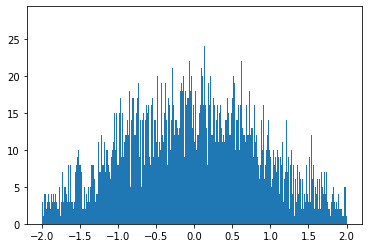

In [23]:
plt.hist(noise, bins=1000, range=(-2., 2.))
plt.show()

In [8]:
# 원본데이터에 Noise 추가
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

# 최대가 1, 최소가 0이 되도록 
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# 노이즈 추가된 영상 보기

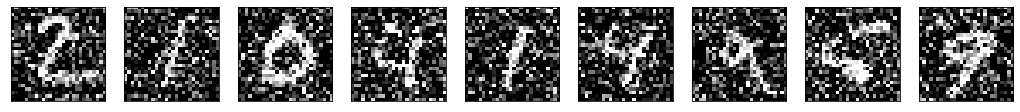

In [25]:
# Noise가 추가된 데이터 확인
n = 10
plt.figure(figsize=(20, 2))
for i in range(1,n):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 모델 정의와 학습 실행

In [28]:
# 모형 구성
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=784))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(784, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy')


# 모형 학습
model.fit(x_train_noisy, x_train, 
          epochs=100,
          batch_size=256,
          shuffle=True,
          validation_data=(x_test_noisy, x_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 22us/sample - loss: 0.2679 - val_loss: 0.2134
Epoch 2/100
60000/60000 [==============================] - 1s 17us/sample - loss: 0.1875 - val_loss: 0.1733
Epoch 3/100
60000/60000 [==============================] - 1s 17us/sample - loss: 0.1680 - val_loss: 0.1618
Epoch 4/100
60000/60000 [==============================] - 1s 16us/sample - loss: 0.1579 - val_loss: 0.1533
Epoch 5/100
60000/60000 [==============================] - 1s 17us/sample - loss: 0.1514 - val_loss: 0.1474
Epoch 6/100
60000/60000 [==============================] - 1s 17us/sample - loss: 0.1463 - val_loss: 0.1434
Epoch 7/100
60000/60000 [==============================] - 1s 17us/sample - loss: 0.1426 - val_loss: 0.1404
Epoch 8/100
60000/60000 [==============================] - 1s 17us/sample - loss: 0.1397 - val_loss: 0.1378
Epoch 9/100
60000/60000 [==============================] - 1s 16us/sample - loss: 0.13

# 결과 확인

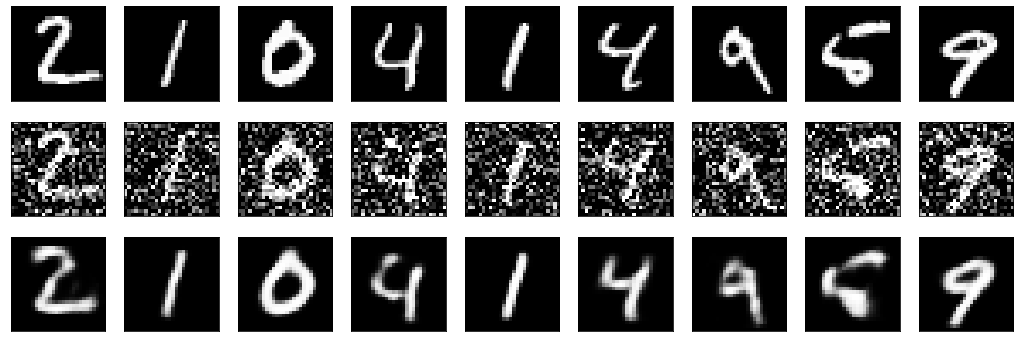

In [29]:
decoded_imgs = model.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 6))
for i in range(1,n):
    # 원본 표시
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 노이즈 첨가 된 것
    ax = plt.subplot(3, n, i + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 노이즈 제거 된 것
    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()